<a href="https://colab.research.google.com/github/Murali125/Mini-project/blob/main/Image_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.74 s (started: 2021-06-19 09:41:43 +00:00)


In [124]:
#getting data : downloading the images.

time: 843 µs (started: 2021-06-19 09:41:46 +00:00)


In [125]:
!pip install bing-image-downloader

time: 2.74 s (started: 2021-06-19 09:41:46 +00:00)


In [126]:
!mkdir image

mkdir: cannot create directory ‘image’: File exists
time: 131 ms (started: 2021-06-19 09:41:48 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("banana fruit",limit=30,output_dir='images',adult_filter_off=True)

In [ ]:
downloader.download("car",limit=30,output_dir='images',adult_filter_off=True)

In [144]:
downloader.download("Rugby Ball leather",limit=30,output_dir='images',adult_filter_off=True)


[%] Downloading Images to /content/images/Rugby Ball leather


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/36/ac/18/36ac18ae71247bc1ae374fddb2b878a7.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ebayimg.com/images/i/192098916483-0-1/s-l1000.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ebayimg.com/images/g/4bcAAOSwTXdciFwx/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ebayimg.com/images/g/uVQAAOSw-JtcYKg6/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/736x/86/65/d1/8665d1e8f60c29b94d99af5af6fa362b--beyond-the-rack-rugby.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ebayimg.com/images/g/jjoAAOSwnY1dse~n/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.ebayimg.com/images/g/EKgAAOSw8dVe7~ro/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #8 from http://img1

In [145]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

time: 2.92 ms (started: 2021-06-19 09:45:41 +00:00)


In [131]:
target=[]
images=[]
flat_data=[]

DATADIR = '/content/images'
CATEGORIES = ['Rugby Ball leather','banana fruit','car']

time: 4.04 ms (started: 2021-06-19 09:42:16 +00:00)


In [132]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images) 

time: 39.5 s (started: 2021-06-19 09:42:16 +00:00)


In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.25,random_state=109)

time: 16.4 ms (started: 2021-06-19 09:42:56 +00:00)


In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 2min 13s (started: 2021-06-19 09:42:56 +00:00)


In [135]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2,
       2])

time: 159 ms (started: 2021-06-19 09:45:10 +00:00)


In [136]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2])

time: 3.63 ms (started: 2021-06-19 09:45:10 +00:00)


In [137]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.23 ms (started: 2021-06-19 09:45:10 +00:00)


In [138]:
accuracy_score(y_pred,y_test)

0.9565217391304348

time: 4.16 ms (started: 2021-06-19 09:45:10 +00:00)


In [139]:
confusion_matrix(y_pred,y_test)

array([[5, 0, 0],
       [0, 9, 0],
       [0, 1, 8]])

time: 5 ms (started: 2021-06-19 09:45:10 +00:00)


In [140]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 51.1 ms (started: 2021-06-19 09:45:10 +00:00)


In [141]:
model = pickle.load(open('img_model.p','rb'))

time: 18.7 ms (started: 2021-06-19 09:45:10 +00:00)


ENTER YOUR URLhttps://upload.wikimedia.org/wikipedia/commons/8/8a/Banana-Single.jpg
PREDICTED OUTPUT:banana fruit


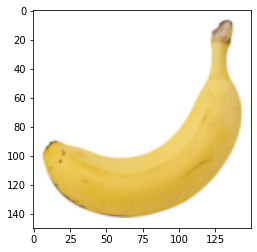

time: 9.66 s (started: 2021-06-19 09:45:10 +00:00)


In [142]:
flat_data = []
url = input('ENTER YOUR URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')